# データの用意
- データのダウンロード
- タイトル行の追加

In [1]:
# インポート
import requests

response = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data")
with open('input/imports-85.data', mode='wb') as f:
    f.write(response.content)

In [2]:
# タイトル行追加
with open('input/imports-85.data', mode='r') as f:
    data = f.read()

title = 'symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price'
data = f'{title}\n{data}'

with open("input/automobile.csv", mode='w') as f:
    f.write(data)

In [3]:
import pandas as pd
pd.set_option("display.max_columns", 30)

df = pd.read_csv('input/automobile.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# データの前処理

In [8]:
# データの形状と列名の取得
print("shape:", df.shape)
print("columns:", df.columns)

shape: (205, 26)
columns: Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [9]:
df[["make", "price"]]

,make,price
0,alfa-romero,13495
1,alfa-romero,16500
2,alfa-romero,16500
3,audi,13950
4,audi,17450
...,...,...
200,volvo,16845
201,volvo,19045
202,volvo,21485
203,volvo,22470


In [10]:
df[["make", "width", "price"]].query("width > 70")

,make,width,price
6,audi,71.4,17710
7,audi,71.4,18920
8,audi,71.4,23875
17,bmw,70.9,36880
49,jaguar,70.6,36000
67,mercedes-benz,70.3,25552
68,mercedes-benz,70.3,28248
69,mercedes-benz,70.3,28176
70,mercedes-benz,71.7,31600
71,mercedes-benz,71.7,34184


In [11]:
df[["make", "price"]].loc[10:15]

,make,price
10,bmw,16430
11,bmw,16925
12,bmw,20970
13,bmw,21105
14,bmw,24565
15,bmw,30760


In [12]:
df[["make", "width"]].groupby(["make"]).mean()

,width
make,
alfa-romero,64.566667
audi,68.714286
bmw,66.475000
chevrolet,62.500000
dodge,64.166667
honda,64.384615
isuzu,63.550000
jaguar,69.933333
mazda,65.588235


In [13]:
# 基本統計量の確認
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [14]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [15]:
# 欠損値の処理
import numpy as np

df["normalized-losses"] = df["normalized-losses"].replace("?", np.nan)
df["bore"] = df["bore"].replace("?", np.nan)
df["stroke"] = df["stroke"].replace("?", np.nan)
df["horsepower"] = df["horsepower"].replace("?", np.nan)
df["peak-rpm"] = df["peak-rpm"].replace("?", np.nan)
df["price"] = df["price"].replace("?", np.nan)

df = df.astype({"normalized-losses":"float64","bore":"float64","stroke":"float64","horsepower":"float64","peak-rpm":"float64","price":"float64",})

In [16]:
# 量的データの統計量確認
df[["width", "length", "horsepower", "price"]].describe()

,width,length,horsepower,price
count,205.000000,205.000000,203.000000,201.000000
mean,65.907805,174.049268,104.256158,13207.129353
std,2.145204,12.337289,39.714369,7947.066342
min,60.300000,141.100000,48.000000,5118.000000
25%,64.100000,166.300000,70.000000,7775.000000
50%,65.500000,173.200000,95.000000,10295.000000
75%,66.900000,183.100000,116.000000,16500.000000
max,72.300000,208.100000,288.000000,45400.000000


In [18]:
# 分散の確認
df[["horsepower", "price"]].var()

horsepower    1.577231e+03
price         6.315586e+07
dtype: float64

In [19]:
print(df["make"].unique())
print(type(df["make"]))

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
<class 'pandas.core.series.Series'>


In [20]:
# 欠損値の確認
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [21]:
print("df count:", df.count())
df_a = df.dropna()
print("df_a count:", df_a.count())

df count: symboling            205
normalized-losses    164
make                 205
fuel-type            205
aspiration           205
num-of-doors         205
body-style           205
drive-wheels         205
engine-location      205
wheel-base           205
length               205
width                205
height               205
curb-weight          205
engine-type          205
num-of-cylinders     205
engine-size          205
fuel-system          205
bore                 201
stroke               201
compression-ratio    205
horsepower           203
peak-rpm             203
city-mpg             205
highway-mpg          205
price                201
dtype: int64
df_a count: symboling            160
normalized-losses    160
make                 160
fuel-type            160
aspiration           160
num-of-doors         160
body-style           160
drive-wheels         160
engine-location      160
wheel-base           160
length               160
width                160
height         

{'whiskers': [<matplotlib.lines.Line2D at 0x24479533290>,
 'caps': [<matplotlib.lines.Line2D at 0x24479540a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x244795320d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24479541fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x244795429d0>],
 'means': []}

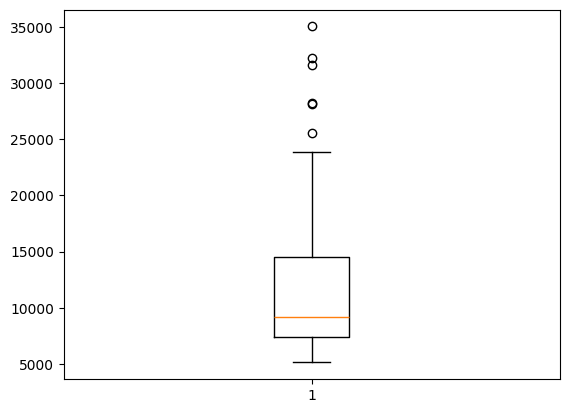

In [22]:
# 外れ値の確認
from matplotlib import pyplot as plt
plt.boxplot(df_a["price"].values)

In [23]:
df_b = df.fillna({
    "normalized-losses":df['normalized-losses'].mean(),
    "bore":df['bore'].mean(),
    "stroke":df['stroke'].mean(),
    "horsepower":df["horsepower"].mean(),
    "peak-rpm":df["peak-rpm"].mean(),
    "price":df["price"].mean()
})

In [24]:
df_b.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [25]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

<Axes: >

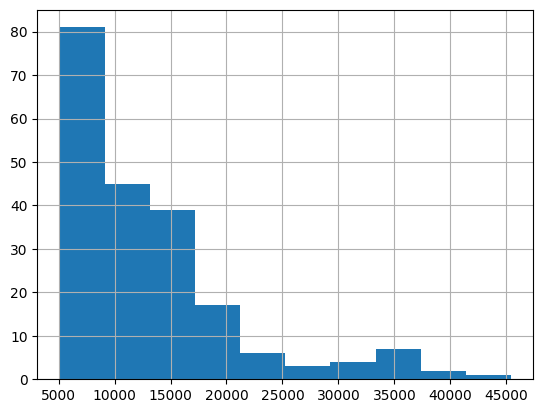

In [26]:
# 価格のヒストグラム
df_b["price"].hist()

make         
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: count, dtype: int64


<Axes: xlabel='make'>

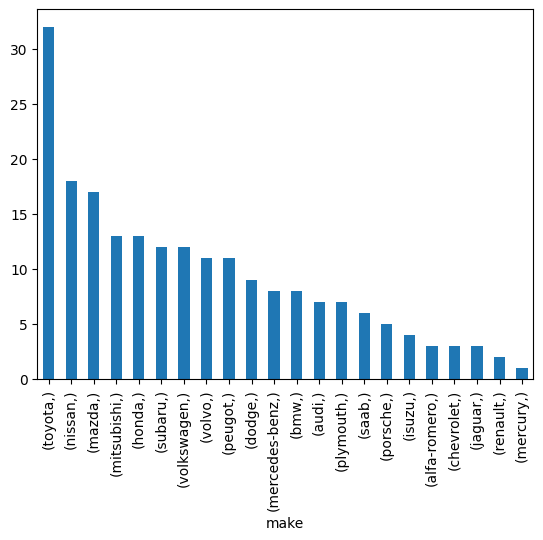

In [28]:
# メーカーの棒グラフ
make_count = df[["make"]].value_counts()
print(make_count)

make_count.plot.bar()

In [29]:
df_b[["horsepower", "price"]].corr()

,horsepower,price
horsepower,1.000000,0.757917
price,0.757917,1.000000


<Axes: >

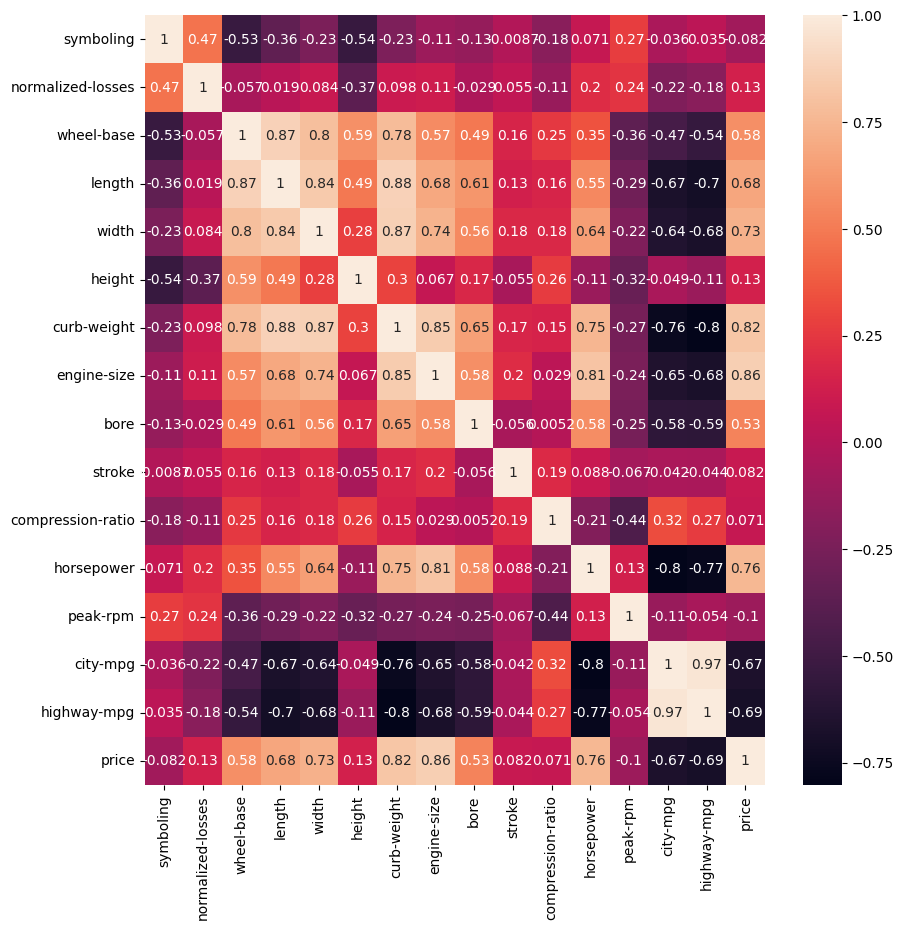

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df_b.select_dtypes(include=[np.number, bool]).corr(), annot=True)

In [31]:
df2 = pd.get_dummies(df_b["make"])
df2

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [32]:
df3 = pd.concat([df_b.drop(["make"], axis=1), df2], axis=1)
df3

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,...,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122.0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,3,122.0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,122.0,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
201,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
202,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
203,-1,95.0,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


<Axes: >

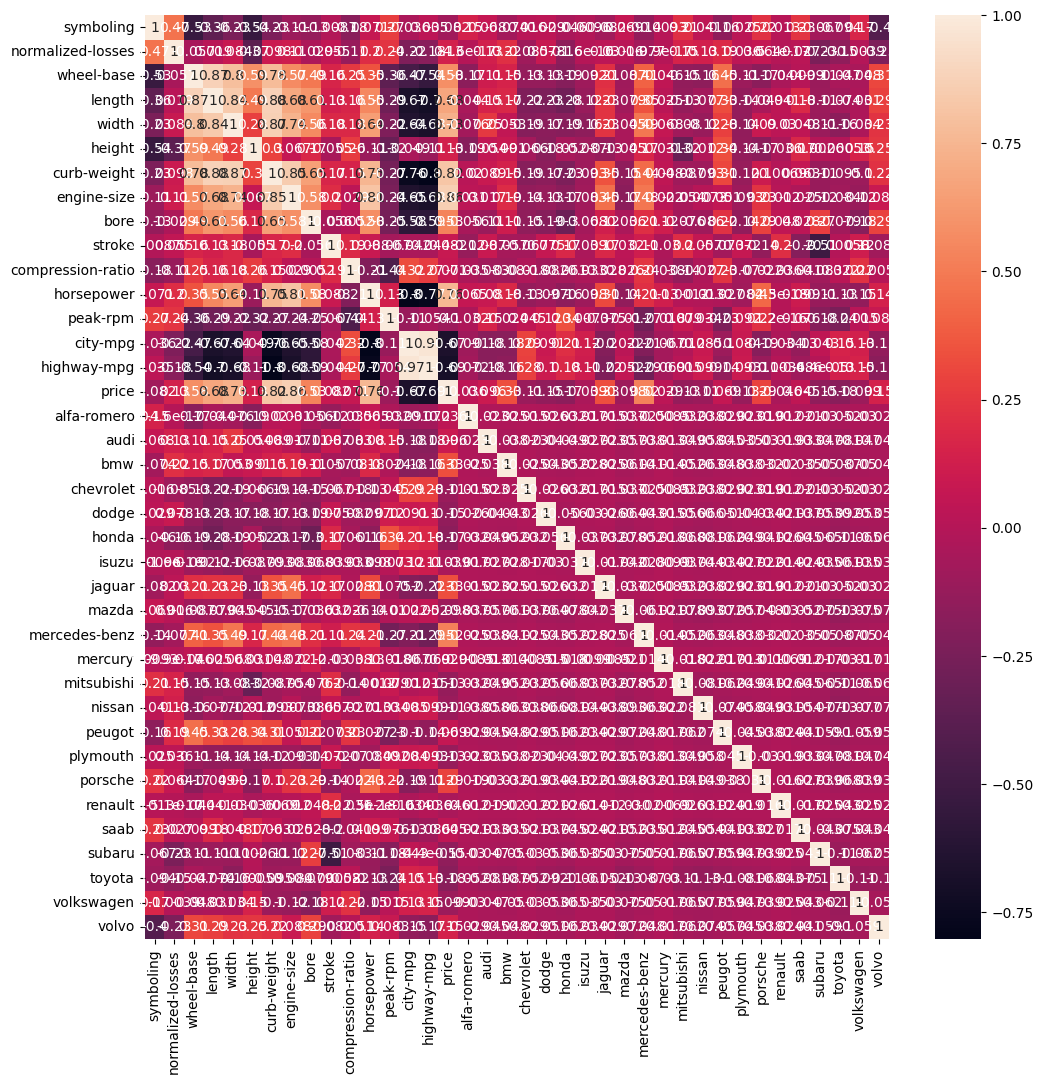

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(df3.select_dtypes(include=[np.number, bool]).corr(), annot=True)

In [34]:
# ラベルエンコーディング
from sklearn.preprocessing import LabelEncoder

for category in ["make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders", "fuel-system"]:
    le = LabelEncoder()
    le.fit(df_b[category])
    
    df_b[category] = le.transform(df_b[category])

df_b

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,1,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,1,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,1,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,21,1,1,1,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,21,1,0,1,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,21,0,1,1,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [35]:
print(df_b.dtypes)

symboling              int64
normalized-losses    float64
make                   int64
fuel-type              int64
aspiration             int64
num-of-doors           int64
body-style             int64
drive-wheels           int64
engine-location        int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int64
num-of-cylinders       int64
engine-size            int64
fuel-system            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


<Axes: >

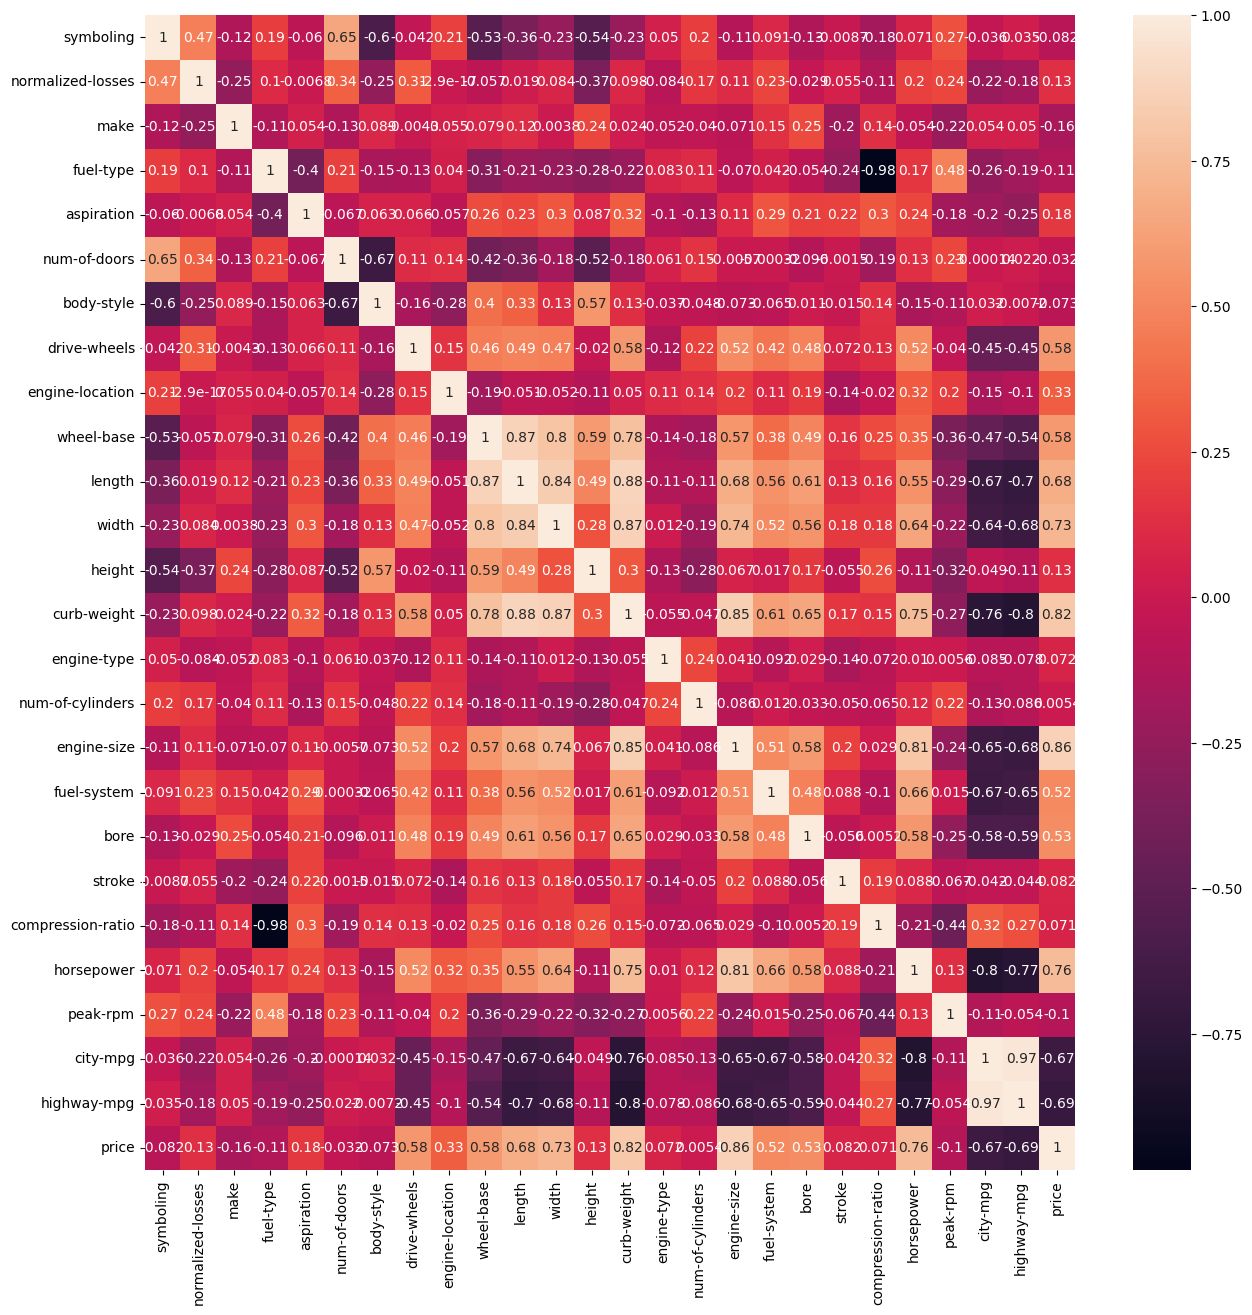

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(df_b.corr(), annot=True)

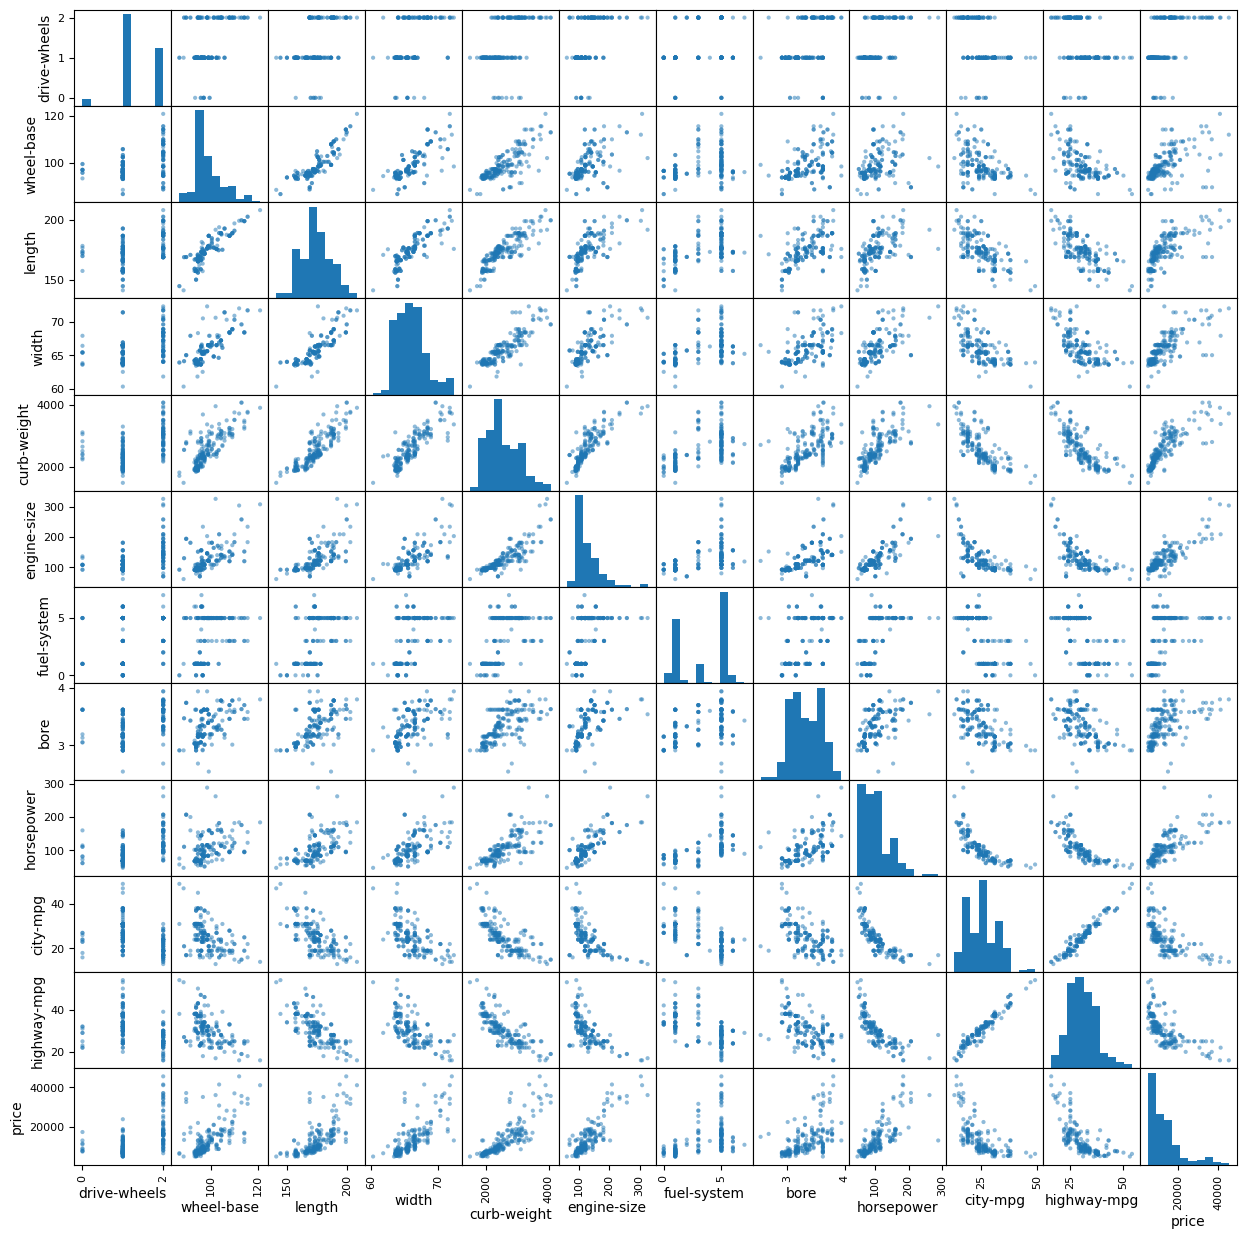

In [37]:
pd.plotting.scatter_matrix(df_b[['drive-wheels', 'wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'fuel-system', 'bore', 'horsepower', 'city-mpg', 'highway-mpg', 'price']], figsize=(15,15), range_padding=0.2)
plt.show()

In [38]:
df_b.to_csv("input/automobile_converted.csv", index=False)